In [47]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    from scipy import stats


Primeras filas del dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450 

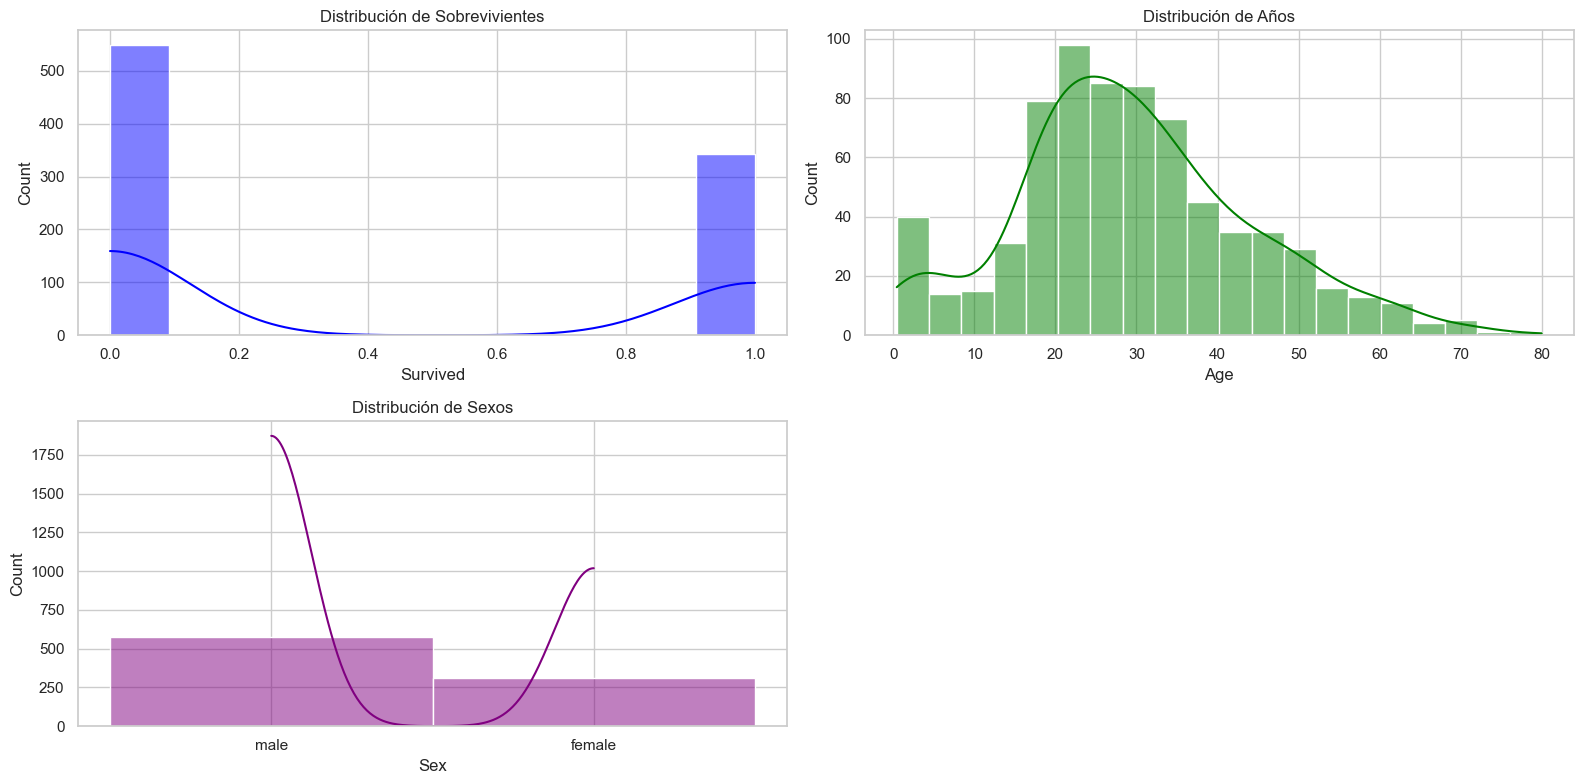

(None,
        PassengerId    Survived      Pclass         Age       SibSp  \
 count   891.000000  891.000000  891.000000  714.000000  891.000000   
 mean    446.000000    0.383838    2.308642   29.699118    0.523008   
 std     257.353842    0.486592    0.836071   14.526497    1.102743   
 min       1.000000    0.000000    1.000000    0.420000    0.000000   
 25%     223.500000    0.000000    2.000000   20.125000    0.000000   
 50%     446.000000    0.000000    3.000000   28.000000    0.000000   
 75%     668.500000    1.000000    3.000000   38.000000    1.000000   
 max     891.000000    1.000000    3.000000   80.000000    8.000000   
 
             Parch        Fare  
 count  891.000000  891.000000  
 mean     0.381594   32.204208  
 std      0.806057   49.693429  
 min      0.000000    0.000000  
 25%      0.000000    7.910400  
 50%      0.000000   14.454200  
 75%      0.000000   31.000000  
 max      6.000000  512.329200  )

In [96]:
from pathlib import Path
file_path = Path(r'C:\Users\jarly\OneDrive\Documentos\UNAD\Análisis de Datos\Fase 5\Titanic-Dataset.csv')

df = pd.read_csv(file_path)

print("Primeras filas del dataset:")
print(df.head())
print("\nInformación del dataset:")
print(df.info())
print("\nEstadísticas descriptivas:")
print(df.describe())

# Configurar estilo de gráficos
sns.set(style="whitegrid")

# Información general del dataset
data_info = df.info()

# Resumen estadístico de las columnas numéricas
data_describe = df.describe()

# Graficar distribuciones para algunas variables clave
plt.figure(figsize=(16, 8))

# Distribución de precios de venta
plt.subplot(2, 2, 1)
sns.histplot(df['Survived'], kde=True, color="blue")
plt.title('Distribución de Sobrevivientes')

# Distribución de años
plt.subplot(2, 2, 2)
sns.histplot(df['Age'], kde=True, color="green")
plt.title('Distribución de Años')

# Distribución de km_driven
plt.subplot(2, 2, 3)
sns.histplot(df['Sex'], kde=True, color="purple")
plt.title('Distribución de Sexos')


plt.tight_layout()
plt.show()

data_info, data_describe

In [108]:
#Elimine la columna Cabin, ya que contenia pocos datos.

df = df.drop('Cabin', axis=1)


# Llenar valores faltantes con la mediana y mdoda para las columnas Age y Embarked
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Verificar el resultado de la limpieza
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


(None,
        PassengerId    Survived      Pclass         Age       SibSp  \
 count   891.000000  891.000000  891.000000  891.000000  891.000000   
 mean    446.000000    0.383838    2.308642   29.361582    0.523008   
 std     257.353842    0.486592    0.836071   13.019697    1.102743   
 min       1.000000    0.000000    1.000000    0.420000    0.000000   
 25%     223.500000    0.000000    2.000000   22.000000    0.000000   
 50%     446.000000    0.000000    3.000000   28.000000    0.000000   
 75%     668.500000    1.000000    3.000000   35.000000    1.000000   
 max     891.000000    1.000000    3.000000   80.000000    8.000000   
 
             Parch        Fare  
 count  891.000000  891.000000  
 mean     0.381594   32.204208  
 std      0.806057   49.693429  
 min      0.000000    0.000000  
 25%      0.000000    7.910400  
 50%      0.000000   14.454200  
 75%      0.000000   31.000000  
 max      6.000000  512.329200  )

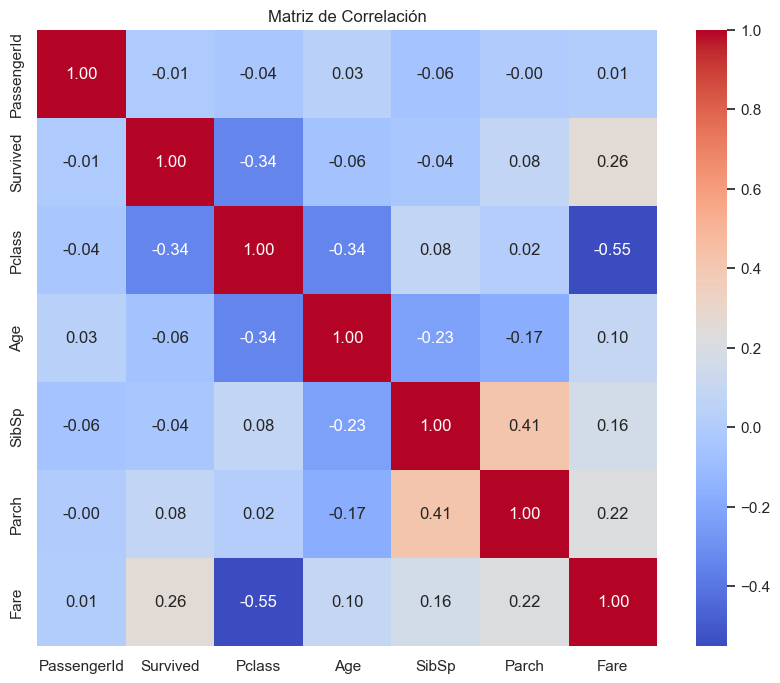

In [110]:
# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación en las columnas numéricas
correlation_matrix = numeric_df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


In [112]:
#  Detección de Valores Atípicos
# Usamos el método Z-score para identificar valores atípicos
outliers = {}
for col in df.select_dtypes(include='number').columns:
    z_scores = np.abs(stats.zscore(df[col]))
    outliers[col] = df[col][z_scores > 3]
    print(f"\nValores atípicos en la columna {col}:\n", outliers[col])


Valores atípicos en la columna PassengerId:
 Series([], Name: PassengerId, dtype: int64)

Valores atípicos en la columna Survived:
 Series([], Name: Survived, dtype: int64)

Valores atípicos en la columna Pclass:
 Series([], Name: Pclass, dtype: int64)

Valores atípicos en la columna Age:
 96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64

Valores atípicos en la columna SibSp:
 16     4
50     4
59     5
68     4
71     5
119    4
159    8
164    4
171    4
180    8
182    4
201    8
233    4
261    4
266    4
278    4
324    8
386    5
480    5
541    4
542    4
683    5
686    4
787    4
792    8
813    4
824    4
846    8
850    4
863    8
Name: SibSp, dtype: int64

Valores atípicos en la columna Parch:
 13     5
25     5
86     3
167    4
360    4
437    3
438    4
567    4
610    5
638    5
678    6
736    3
774    3
858    3
885    5
Name: Parch, dtype: int64

Valores atípicos en la columna Fare:
 27     263.0000
88    

C:\Users\jarly\AppData\Local\Temp\ipykernel_19892\3899328910.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_age = X_age[mask]


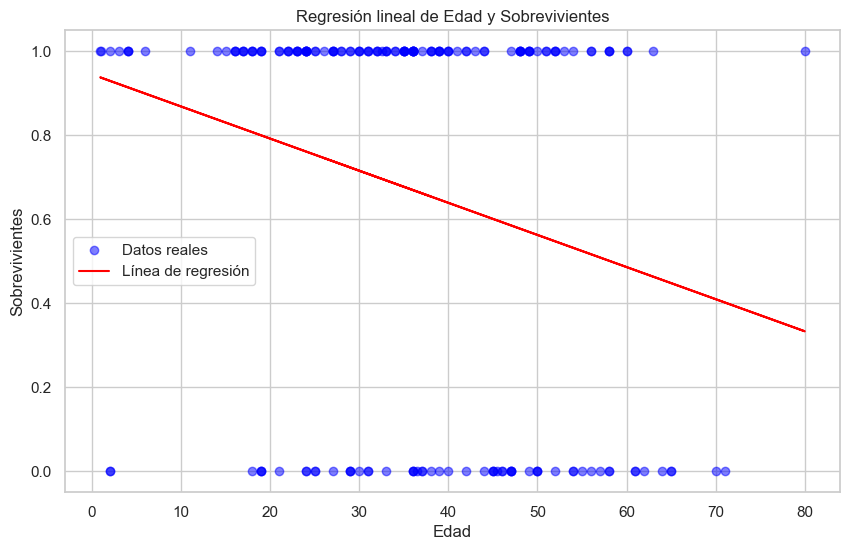

In [128]:
from sklearn.linear_model import LinearRegression

# Seleccionamos la colunma year pa realizar la correlación
X_age = X[['Age']]
y = df['Survived']

# Filtrar los datos que tengan valores completos en X_age y y
mask = ~y.isna() & ~X_age.isna().any(axis=1)
X_age = X_age[mask]
y = y[mask]

# Ahora debería ser posible entrenar el modelo
linear_model_age.fit(X_age, y)

# Crear y ajustar el modelo de regresión lineal solo con 'age'
linear_model_age = LinearRegression()
linear_model_age.fit(X_age, y)

# Hacer predicciones con el modelo
y_pred_age = linear_model_age.predict(X_age)

# Graficar los datos reales y la línea de regresión
plt.figure(figsize=(10, 6))
plt.scatter(X_age, y, color='blue', label="Datos reales", alpha=0.5)
plt.plot(X_age, y_pred_age, color='red', label="Línea de regresión")

# Agregar etiquetas y título
plt.xlabel("Edad")
plt.ylabel("Sobrevivientes")
plt.title("Regresión lineal de Edad y Sobrevivientes")
plt.legend()
plt.show()


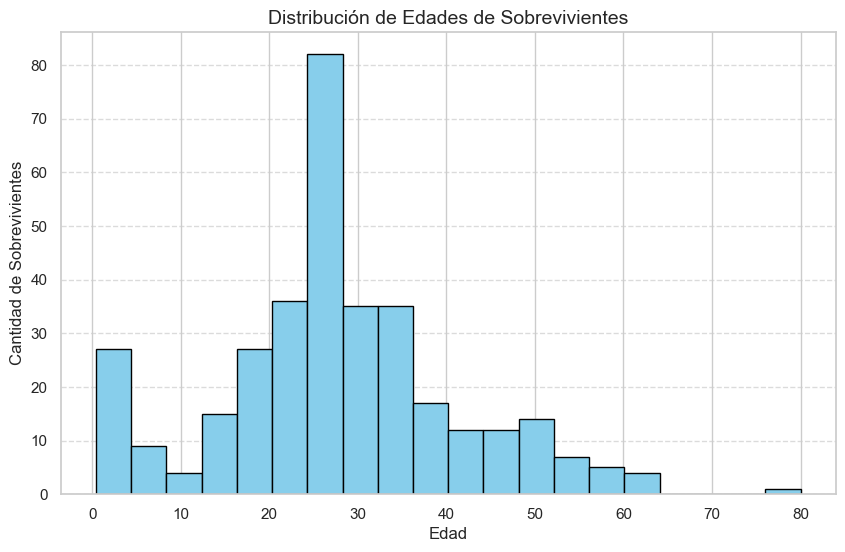

C:\Users\jarly\AppData\Local\Temp\ipykernel_19892\3946387657.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survivors_by_age_group = df['Age'].dropna().groupby(pd.cut(df['Age'], bins=age_bins)).count()


Age
(0, 10]      38
(10, 20]     44
(20, 30]    136
(30, 40]     69
(40, 50]     33
(50, 60]     17
(60, 70]      4
(70, 80]      1
Name: Age, dtype: int64

In [140]:
import matplotlib.pyplot as plt

# Filtrar datos de sobrevivientes
df = df[df['Survived'] == 1]

# Crear un histograma de edades de los sobrevivientes
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Edades de Sobrevivientes', fontsize=14)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Cantidad de Sobrevivientes', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Resumir la cantidad de sobrevivientes por rangos de edad
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
survivors_by_age_group = df['Age'].dropna().groupby(pd.cut(df['Age'], bins=age_bins)).count()
survivors_by_age_group